In [1]:
from matplotlib import pyplot as plt
from torch import manual_seed
from functools import partial

from pathlib import Path
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.models.frequentist import FreqModel
from karpathy_series.makemore.encoding.character import CharacterEncoder, CharacterSet
from karpathy_series.makemore.training.data import FreqTrainingSequencer
from karpathy_series.makemore.training.learning import FreqLearner
from karpathy_series.makemore.bigrams import BiGram

%matplotlib inline
generator = manual_seed(2147483647)

In [2]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_gram_gen = partial(BiGram.generate, char_set.pad)
ts_bi = FreqTrainingSequencer(char_encoder, char_encoder, bi_gram_gen)

In [3]:
freq_model = FreqModel.as_cleared(char_encoder, char_encoder)

In [4]:
freq_training = ts_bi.training_sequence(words)

In [5]:
freq_learner = FreqLearner(freq_model)
freq_learner(freq_training)

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

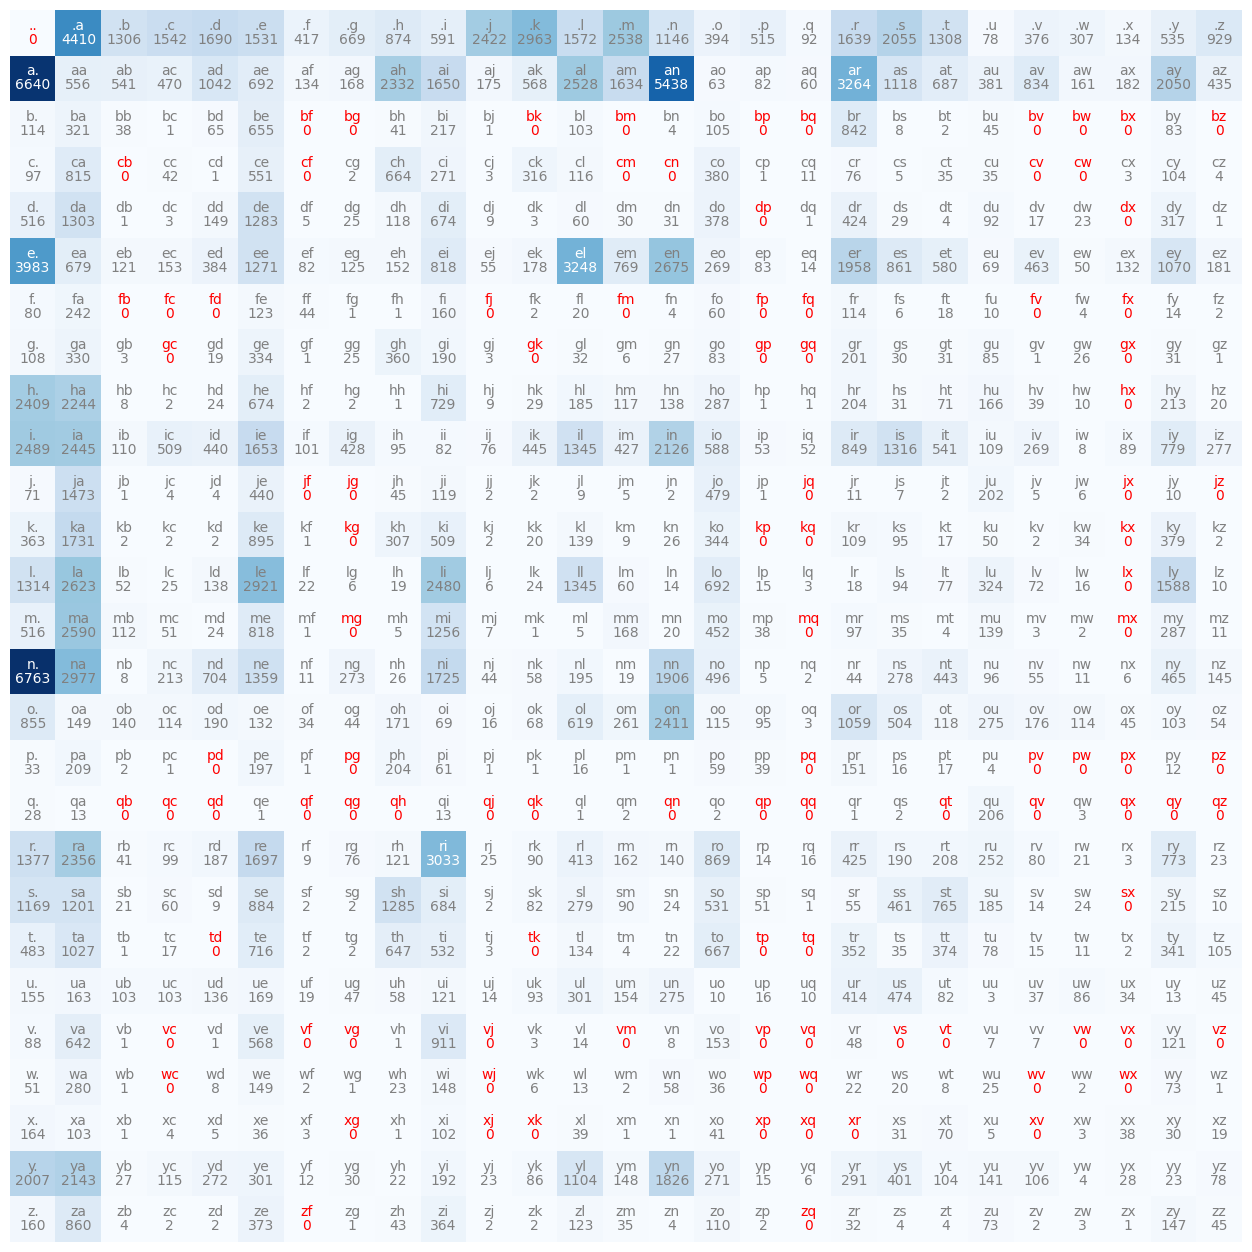

In [6]:
plt.figure(figsize=(16, 16))
plt.imshow(freq_model.under, cmap="Blues")
for i, j, count in freq_model.items():
    code = char_encoder.decode(i) + char_encoder.decode(j)
    color = "red" if count == 0 else ("white" if count > 3000 else "gray")
    plt.text(j, i, code, ha="center", va="bottom", color=color)
    plt.text(j, i, count, ha="center", va="top", color=color)
plt.axis("off")

In [15]:
freq_model.generate()

'juee'